In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import dask.dataframe as dd

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
folder_path = "/content/drive/MyDrive/UMich/"

csv_path = folder_path + "merged_df.csv"
d_embeddings_path = folder_path + "d_embeddings.npz"

In [ ]:
os.path.exists(csv_path)
df = pd.read_csv(csv_path)
df.head()

<ipython-input-5-22caf6ca6b91>:2: DtypeWarning: Columns (9,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,Unnamed: 0,cert_num,name,address,city,state,zip5,beds,payer,code,internal_revenue_code,units,description,inpatient_outpatient,price,code_disambiguator
0,0,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,BLUE CROSS BLUE SHIELD Commercial,0097U,NONE,NaN,Lab Test - Identification of DNA from 22 Patho...,OUTPATIENT,229.5,NONE
1,1,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,0097U,NONE,NaN,Lab Test - Identification of DNA from 22 Patho...,OUTPATIENT,596.7,NONE
2,2,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0097U,NONE,NaN,Lab Test - Identification of DNA from 22 Patho...,OUTPATIENT,918.0,NONE
3,3,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,MAX,0097U,NONE,NaN,Lab Test - Identification of DNA from 22 Patho...,OUTPATIENT,734.4,NONE
4,4,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,MIN,0097U,NONE,NaN,Lab Test - Identification of DNA from 22 Patho...,OUTPATIENT,229.5,NONE


In [ ]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["Cat scratch injury", "Cat scratch disease", "Bartonellosis"]

model = SentenceTransformer('FremyCompany/BioLORD-2023')
#embeddings = model.encode(sentences)
#print(embeddings)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
descriptions = df['description']
print(len(descriptions))
unique_descriptions = descriptions.unique()
print(len(unique_descriptions))
#d_embeddings = model.encode(descriptions)

7138711
271874


In [ ]:
#only run to create embeddings
d_embeddings = model.encode(unique_descriptions)
d_embeddings.shape

#import npz
import numpy as np
np.savez_compressed(folder_path + "d_embeddings.npz", d_embeddings)

In [ ]:
d_embeddings = np.load(d_embeddings_path)
d_embeddings = d_embeddings["arr_0"]
#d_embeddings.shape

In [ ]:
df_embeddings = pd.DataFrame(columns = ["description", "embedding"])
df_embeddings["description"] = unique_descriptions
df_embeddings["embedding"] = d_embeddings.tolist()
df_embeddings.head()

,description,embedding
0,Lab Test - Identification of DNA from 22 Patho...,"[0.09445204585790634, 0.6540446281433105, -0.2..."
1,ROOM & BOARD - PRIVATE MEDICAL & SURGICAL,"[0.12259604781866074, -0.11298449337482452, 0...."
2,ROOM & BOARD - PRIVATE OBSTETRICAL,"[-0.25772711634635925, 0.16054601967334747, -0..."
3,ROOM & BOARD - PRIVATE HOSPICE,"[0.39828479290008545, 0.3118447959423065, -0.1..."
4,ROOM & BOARD - SEMI-PRIVATE MEDICAL & SURGICAL,"[0.06386258453130722, -0.04485863447189331, 0...."


In [ ]:
# prompt: use birch clustering and hierarchical clustering from sklearn to generate cluster labels for each embedding in def_embeddings

from sklearn.cluster import Birch, AgglomerativeClustering

# Assuming 'd_embeddings' is already defined and contains the embeddings.
# If not, uncomment the following lines to generate embeddings again.
# unique_descriptions = df['description'].unique()
# d_embeddings = model.encode(unique_descriptions)


# Birch Clustering
birch_model = Birch(n_clusters=None, threshold= 5) # Adjust threshold as needed
birch_model.fit(d_embeddings)
birch_labels = birch_model.labels_

# Hierarchical Clustering
#hierarchical_model = AgglomerativeClustering(n_clusters=None) # Adjust n_clusters as needed
#hierarchical_labels = hierarchical_model.fit_predict(d_embeddings)


# Add cluster labels to the DataFrame
df_embeddings['birch_cluster'] = birch_labels
#df_embeddings['hierarchical_cluster'] = hierarchical_labels

print(df_embeddings.head())

                                         description  \
0  Lab Test - Identification of DNA from 22 Patho...   
1          ROOM & BOARD - PRIVATE MEDICAL & SURGICAL   
2                 ROOM & BOARD - PRIVATE OBSTETRICAL   
3                     ROOM & BOARD - PRIVATE HOSPICE   
4     ROOM & BOARD - SEMI-PRIVATE MEDICAL & SURGICAL   

                                           embedding  birch_cluster  
0  [0.09445204585790634, 0.6540446281433105, -0.2...          62682  
1  [0.12259604781866074, -0.11298449337482452, 0....          67343  
2  [-0.25772711634635925, 0.16054601967334747, -0...          54333  
3  [0.39828479290008545, 0.3118447959423065, -0.1...          67343  
4  [0.06386258453130722, -0.04485863447189331, 0....          67343  


In [ ]:
df_embeddings.head()

,description,embedding,birch_cluster
0,Lab Test - Identification of DNA from 22 Patho...,"[0.09445204585790634, 0.6540446281433105, -0.2...",62682
1,ROOM & BOARD - PRIVATE MEDICAL & SURGICAL,"[0.12259604781866074, -0.11298449337482452, 0....",67343
2,ROOM & BOARD - PRIVATE OBSTETRICAL,"[-0.25772711634635925, 0.16054601967334747, -0...",54333
3,ROOM & BOARD - PRIVATE HOSPICE,"[0.39828479290008545, 0.3118447959423065, -0.1...",67343
4,ROOM & BOARD - SEMI-PRIVATE MEDICAL & SURGICAL,"[0.06386258453130722, -0.04485863447189331, 0....",67343


In [ ]:
df_embeddings.to_csv(folder_path + "df_description_clustering.csv", index=False)

KeyboardInterrupt: 

In [ ]:
df_embeddings[["description", "birch_cluster"]].to_csv(folder_path + "df_description_clustering.csv", index=False)

In [ ]:
df_embeddings["birch_cluster"].max()

71077

In [ ]:
temp = df_embeddings["birch_cluster"].value_counts().reset_index()
temp[temp["count"] > 50]

,birch_cluster,count
0,6914,3208
1,6907,974
2,32112,920
3,6912,744
4,6981,729
...,...,...
307,33326,51
308,7713,51
309,70135,51
310,14789,51


In [ ]:
df_embeddings[df_embeddings["birch_cluster"] == 6914]

,description,embedding,birch_cluster
85331,SCREW 71129232,"[0.12648332118988037, 0.038213085383176804, 0....",6914
85332,SCREW 71129236,"[0.13208016753196716, 0.04541958123445511, 0.4...",6914
85335,SCREW 71129238,"[0.13889716565608978, 0.04328146204352379, 0.4...",6914
85345,SCREW 71129240,"[0.08430574834346771, 0.044401831924915314, 0....",6914
85347,SCREW 71129244,"[0.12660996615886688, 0.04119177907705307, 0.4...",6914
...,...,...,...
182080,SCREW#1123439,"[0.17553402483463287, 0.36250385642051697, 0.3...",6914
182081,SCREW#1123440,"[0.16010691225528717, 0.3694048523902893, 0.30...",6914
182082,SCREW#378103,"[0.16564351320266724, 0.12845158576965332, 0.3...",6914
220836,SCREW KLS 25773 SERIES,"[0.18790316581726074, 0.2380937933921814, 0.29...",6914


In [ ]:
df_clusters = df_embeddings[["description", "birch_cluster"]]

In [ ]:
#start here
df_clusters = pd.read_csv(folder_path + "df_description_clustering.csv")

In [ ]:
#code to clean descriptions
#change this to merged_df file location
folder_path = "/content/drive/MyDrive/UMich/"
csv_path = folder_path + "merged_df.csv"
df = pd.read_csv(csv_path)

df_clusters = pd.read_csv(folder_path + "df_description_clustering.csv")
df_full = df.merge(df_clusters, on = "description", how="left")

#change this to alter min price
min_price = 1000
df_clean = df_full[df_full["price"] > 1000]

#change this to keep more or less descriptions
clean_vals = df_clean["description"].value_counts().reset_index()
num_hospitals = df_clean["cert_num"].nunique()
clean_vals = clean_vals[clean_vals["count"] >= num_hospitals]

df_clean = df_clean.merge(clean_vals, on = "description", how="inner")
df_clean_filt = df_clean[["cert_num", "description", "birch_cluster"]]

In [ ]:
df_full = df.merge(df_clusters, on = "description", how="left")

In [ ]:
df_full.shape

(7138711, 17)

In [ ]:
df_full["price"].median()

281.07

In [ ]:
min_price = 1000
df_clean = df_full[df_full["price"] > 1000]

In [ ]:
df_clean.head()

,Unnamed: 0,cert_num,name,address,city,state,zip5,beds,payer,code,internal_revenue_code,units,description,inpatient_outpatient,price,code_disambiguator,birch_cluster
7,7,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0111,NONE,NaN,ROOM & BOARD - PRIVATE MEDICAL & SURGICAL,UNSPECIFIED,1722.0,NONE,67343
8,8,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0112,NONE,NaN,ROOM & BOARD - PRIVATE OBSTETRICAL,UNSPECIFIED,3588.0,NONE,54333
9,9,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0115,NONE,NaN,ROOM & BOARD - PRIVATE HOSPICE,UNSPECIFIED,1268.0,NONE,67343
10,10,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0121,NONE,NaN,ROOM & BOARD - SEMI-PRIVATE MEDICAL & SURGICAL,UNSPECIFIED,3444.0,NONE,67343
11,11,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0171,NONE,NaN,ROOM & BOARD - NEWBORN LEVEL I,UNSPECIFIED,3834.0,NONE,65681


In [ ]:
clean_vals = df_clean["description"].value_counts().reset_index()
clean_vals[clean_vals["count"] != 1]

,description,count
0,CYSTOSCOPY AND TREATMENT,2384
1,KNEE ARTHROSCOPY/SURGERY,1845
2,Repair Of Hernia Requiring Incision,1266
3,INFECTIOUS AND PARASITIC DISEASES WITH O.R. PR...,1097
4,CHEST PAIN,1094
...,...,...
84205,"SCREW, SELF-TAPPING, UNIPLANAR, 6.5MM X 30MM (...",2
84206,"SCREW, 4.5MM HEADLESS COMPRESSION, SHORT THREA...",2
84207,ARANESP 300MCG SYR,2
84208,CLOBETASOL PROPIN 0.05% CR 60G,2


In [ ]:
num_hospitals = df_clean["cert_num"].nunique()
print(num_hospitals)

75


In [ ]:
clean_vals = df_clean["description"].value_counts().reset_index()
clean_vals = clean_vals[clean_vals["count"] >= num_hospitals]
clean_vals

,description,count
0,CYSTOSCOPY AND TREATMENT,2384
1,KNEE ARTHROSCOPY/SURGERY,1845
2,Repair Of Hernia Requiring Incision,1266
3,INFECTIOUS AND PARASITIC DISEASES WITH O.R. PR...,1097
4,CHEST PAIN,1094
...,...,...
3372,Abdom Paracentesis Dx/ther W Imaging Guidance,75
3373,Icar Catheter Ablation Atrioventr Node Function,75
3374,Ephys Eval Pacg Cvdfb Lds W/tstg Of Pulse Gen,75
3375,"Echo Heart Xthoracic, Stress/rest, W Contin Ecg",75


In [ ]:
df_clean = df_clean.merge(clean_vals, on = "description", how="inner")
df_clean.head()

,Unnamed: 0,cert_num,name,address,city,state,zip5,beds,payer,code,internal_revenue_code,units,description,inpatient_outpatient,price,code_disambiguator,birch_cluster,count
0,251,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,11770,NONE,NaN,Removal of Pilonidal Cyst,OUTPATIENT,14266.79,NONE,70134,93
1,252,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,11770,NONE,NaN,Removal of Pilonidal Cyst,OUTPATIENT,21948.91,NONE,70134,93
2,253,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,11771,NONE,NaN,Removal of Pilonidal Cyst,OUTPATIENT,14266.79,NONE,70134,93
3,254,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,11771,NONE,NaN,Removal of Pilonidal Cyst,OUTPATIENT,21948.91,NONE,70134,93
4,404,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,19120,NONE,NaN,Removal of Breast Growth Requiring Incision,OUTPATIENT,15849.42,NONE,70079,130


In [ ]:
df_clean.shape

(1143503, 18)

In [ ]:
#load in Krishna's payer dataset
#payer_df = dd.read_csv(folder_path + "onehot_payer_fulldf.csv", dtype={'units': 'object'}).drop(columns=["Unnamed: 0", 'Unnamed: 0.1'])
payer_df = pd.read_csv(folder_path + "onehot_payer_fulldf.csv").drop(columns=["Unnamed: 0", 'Unnamed: 0.1'])
payer_df.head()

<ipython-input-17-49f8ca72c6ea>:3: DtypeWarning: Columns (11,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  payer_df = pd.read_csv(folder_path + "onehot_payer_fulldf.csv").drop(columns=["Unnamed: 0", 'Unnamed: 0.1'])


,cert_num,name,address,city,state,zip5,beds,payer,code,internal_revenue_code,...,code_disambiguator,BCBS,Medicare,Medicaid,UHC,Aetna,Cigna,Cash Price,Gross Charge,HospitalInsurance
0,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,BLUE CROSS BLUE SHIELD Commercial,0097U,NONE,...,NONE,1,0,0,0,0,0,0,0,0
1,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,0097U,NONE,...,NONE,0,0,0,0,0,0,1,0,0
2,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0097U,NONE,...,NONE,0,0,0,0,0,0,0,1,0
3,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0111,NONE,...,NONE,0,0,0,0,0,0,0,1,0
4,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,0112,NONE,...,NONE,0,0,0,0,0,0,0,1,0


In [ ]:
df_clean_filt = df_clean[["cert_num", "description", "birch_cluster"]]
df_clean_filt.head()

,cert_num,description,birch_cluster
0,230005,Removal of Pilonidal Cyst,70134
1,230005,Removal of Pilonidal Cyst,70134
2,230005,Removal of Pilonidal Cyst,70134
3,230005,Removal of Pilonidal Cyst,70134
4,230005,Removal of Breast Growth Requiring Incision,70079


In [ ]:
df_clean_filt.to_csv(folder_path + "df_description_clean.csv", index=False)

In [ ]:
df_clean_

In [ ]:
df_clean_filt2 = df_clean_filt[["description"]]
df_clean_filt2.head()

,description
0,Removal of Pilonidal Cyst
1,Removal of Pilonidal Cyst
2,Removal of Pilonidal Cyst
3,Removal of Pilonidal Cyst
4,Removal of Breast Growth Requiring Incision


In [ ]:
#df_clean_dask = dd.from_pandas(df_clean_filt)
#payer_df_pd = payer_df.compute()
#payer_df = payer_df.repartition(npartitions=10)
df_final = payer_df.merge(df_clean_filt2, on = ["description"], how="inner")
#df_final = df_clean_filt2.merge(payer_df, on = ["description"], how="inner")
df_final.head()

In [ ]:
df_final.shape

,cert_num,description,birch_cluster,name,address,city,state,zip5,beds,payer,...,code_disambiguator,BCBS,Medicare,Medicaid,UHC,Aetna,Cigna,Cash Price,Gross Charge,HospitalInsurance
61122082,232034,NON-BACTERIAL INFECTION OF NERVOUS SYSTEM EXCE...,26283,ASCENSION BORGESS PIPP HOSPITAL,411 NAOMI STREET,PLAINWELL,MI,49080,43,UHC95B UNITED HLTH MISC PPO2636,...,NONE,0,0,0,1,0,0,0,0,0
61122083,232034,NON-BACTERIAL INFECTION OF NERVOUS SYSTEM EXCE...,26283,ASCENSION BORGESS PIPP HOSPITAL,411 NAOMI STREET,PLAINWELL,MI,49080,43,UHC96G UMR UHC PPO BOX 1458042636,...,NONE,0,0,0,1,0,0,0,0,0
61122084,232034,NON-BACTERIAL INFECTION OF NERVOUS SYSTEM EXCE...,26283,ASCENSION BORGESS PIPP HOSPITAL,411 NAOMI STREET,PLAINWELL,MI,49080,43,UHC96G UMR UHC PPO BOX 1458042639,...,NONE,0,0,0,1,0,0,0,0,0
61122085,232034,NON-BACTERIAL INFECTION OF NERVOUS SYSTEM EXCE...,26283,ASCENSION BORGESS PIPP HOSPITAL,411 NAOMI STREET,PLAINWELL,MI,49080,43,UHC98E UMR UHC PPO BOX 305412636,...,NONE,0,0,0,1,0,0,0,0,0
61122086,232034,NON-BACTERIAL INFECTION OF NERVOUS SYSTEM EXCE...,26283,ASCENSION BORGESS PIPP HOSPITAL,411 NAOMI STREET,PLAINWELL,MI,49080,43,UHC98E UMR UHC PPO BOX 305412639,...,NONE,0,0,0,1,0,0,0,0,0


In [ ]:
df_final.shape

(61122087, 25)

In [ ]:
# Create plots for each of the top 5 hospitals
for hospital in top_hospitals:
    hospital_data = top_hospital_data[top_hospital_data['cert_num'] == hospital]
    top_insurance_companies = hospital_data.nlargest(5, 'description')['payer']

    plt.figure(figsize=(10, 6))
    sns.barplot(x='payer', y='description', data=hospital_data[hospital_data['payer'].isin(top_insurance_companies)])
    plt.title(f"Top 5 Insurance Companies for Hospital {hospital}")
    plt.xlabel("Insurance Company")
    plt.ylabel("Number of Claims")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

In [ ]:
cimport requests

In [ ]:
# Replace 'your_census_api_key_here' with your actual Census API key
API_KEY = '4026107b0471dadb6c4e191b05da5f8abf0c89ce'
BASE_URL = 'https://api.census.gov/data/2020/acs/acs5'

# Define variables for the data to be fetched
# B19013_001E: Median Household Income
# Other demographic variables can be added based on your requirements
VARIABLES = ["B19013_001E", "B01001_001E"]  # Median income and total population
VARIABLES_STR = ",".join(VARIABLES)

# Function to get data for all ZIP codes in Michigan
def fetch_census_data():
    params = {
        "get": VARIABLES_STR,
        "for": "zip code tabulation area:*",
        "in": "state:26",  # Michigan's state FIPS code is 26
        "key": API_KEY
    }

    response = requests.get(BASE_URL, params=params)

    if response.status_code == 200:
        data = response.json()
        # Convert the JSON response into a pandas DataFrame
        df = pd.DataFrame(data[1:], columns=data[0])
        return df
    else:
        raise Exception(f"API request failed with status code {response.status_code}: {response.text}")

In [ ]:
try:
    data = fetch_census_data()
    # Rename columns for better readability
    data.rename(columns={
        "B19013_001E": "Median_Income",
        "B01001_001E": "Total_Population",
        "zip code tabulation area": "ZIP_Code"
    }, inplace=True)

    # Convert numeric columns to appropriate data types
    data["Median_Income"] = pd.to_numeric(data["Median_Income"], errors='coerce')
    data["Total_Population"] = pd.to_numeric(data["Total_Population"], errors='coerce')

    # Display the data
    print(data.head())

    # Save the data to a CSV file
    data.to_csv(folder_path + "michigan_zipcode_data.csv", index=False)
    print("Data saved to michigan_zipcode_data.csv")

except Exception as e:
    print(f"Error: {e}")

In [ ]:
df[df["description"] == "SCREW 71129232"]

,Unnamed: 0,cert_num,name,address,city,state,zip5,beds,payer,code,internal_revenue_code,units,description,inpatient_outpatient,price,code_disambiguator
1715830,1715830,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,AETNA,NONE,278,NaN,SCREW 71129232,OUTPATIENT,144.32,9570046
1715831,1715831,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,AMISH BOARD,NONE,278,NaN,SCREW 71129232,OUTPATIENT,82.00,9570046
1715832,1715832,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,BLUE CARE NETWORK,NONE,278,NaN,SCREW 71129232,OUTPATIENT,135.91,9570046
1715833,1715833,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Blue Cross Blue Shield of MI BPP (Blue Preferr...,NONE,278,NaN,SCREW 71129232,OUTPATIENT,135.91,9570046
1715834,1715834,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Blue Cross Blue Shield of MI PPO,NONE,278,NaN,SCREW 71129232,OUTPATIENT,135.91,9570046
1715835,1715835,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Cigna,NONE,278,NaN,SCREW 71129232,OUTPATIENT,144.32,9570046
1715836,1715836,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Employee Benefit Logistics,NONE,278,NaN,SCREW 71129232,OUTPATIENT,98.40,9570046
1715837,1715837,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,McLaren Health Plan - Commercial HMO,NONE,278,NaN,SCREW 71129232,OUTPATIENT,104.37,9570046
1715838,1715838,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,McLaren Health Plan Community,NONE,278,NaN,SCREW 71129232,OUTPATIENT,104.37,9570046
1715839,1715839,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Mclaren Health Advantage PPO,NONE,278,NaN,SCREW 71129232,OUTPATIENT,104.37,9570046


In [ ]:
screws = df_embeddings[df_embeddings["birch_cluster"] == 6914]
screw_hospitals = df.merge(screws, on = "description")


In [ ]:
screw_hospitals[(screw_hospitals["cert_num"] == 230118) & (screw_hospitals["payer"] != "CASH PRICE")]

,Unnamed: 0,cert_num,name,address,city,state,zip5,beds,payer,code,internal_revenue_code,units,description,inpatient_outpatient,price,code_disambiguator,embedding,birch_cluster
0,1715830,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,AETNA,NONE,278,NaN,SCREW 71129232,OUTPATIENT,144.32,9570046,"[0.12648332118988037, 0.038213085383176804, 0....",6914
1,1715831,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,AMISH BOARD,NONE,278,NaN,SCREW 71129232,OUTPATIENT,82.00,9570046,"[0.12648332118988037, 0.038213085383176804, 0....",6914
2,1715832,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,BLUE CARE NETWORK,NONE,278,NaN,SCREW 71129232,OUTPATIENT,135.91,9570046,"[0.12648332118988037, 0.038213085383176804, 0....",6914
3,1715833,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Blue Cross Blue Shield of MI BPP (Blue Preferr...,NONE,278,NaN,SCREW 71129232,OUTPATIENT,135.91,9570046,"[0.12648332118988037, 0.038213085383176804, 0....",6914
4,1715834,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Blue Cross Blue Shield of MI PPO,NONE,278,NaN,SCREW 71129232,OUTPATIENT,135.91,9570046,"[0.12648332118988037, 0.038213085383176804, 0....",6914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,1744334,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,McLaren Health Plan Community,NONE,278,NaN,SCREW 71332535,OUTPATIENT,379.29,9573047,"[0.17104719579219818, 0.04535291716456413, 0.3...",6914
2583,1744335,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Mclaren Health Advantage PPO,NONE,278,NaN,SCREW 71332535,OUTPATIENT,379.29,9573047,"[0.17104719579219818, 0.04535291716456413, 0.3...",6914
2584,1744336,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Priority Health HMO,NONE,278,NaN,SCREW 71332535,OUTPATIENT,531.33,9573047,"[0.17104719579219818, 0.04535291716456413, 0.3...",6914
2585,1744337,230118,MCLAREN THUMB REGION,1100 S VAN DYKE RD,BAD AXE,MI,48413,64,Priority Health PPO,NONE,278,NaN,SCREW 71332535,OUTPATIENT,531.33,9573047,"[0.17104719579219818, 0.04535291716456413, 0.3...",6914


<Axes: ylabel='Frequency'>

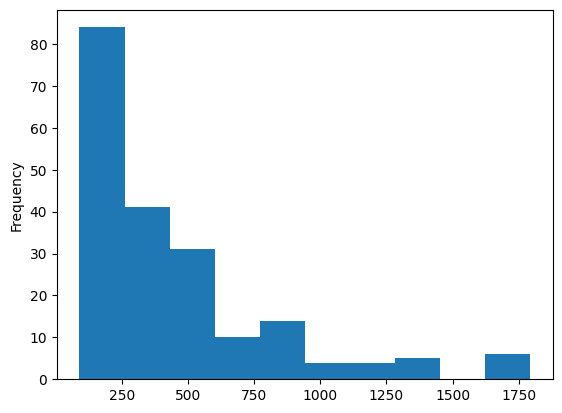

In [ ]:
screw_hospitals[screw_hospitals["payer"] == "AETNA"]["price"].plot.hist()